In [16]:
#importing libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#download dataset and setting "Txn_date" as index
df = pd.read_csv("data_no_outliers.csv")
df = df.set_index('Txn_date')
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df

,Invoice_id,Cust_id,Product_Sub_category,Product_Category,Qty,Rate,Tax,Total_Amt,Store_type
Txn_date,,,,,,,,,
2016-01-02,80348907828,267124,Computers,Electronics,2,552,115.920,1219.920,TeleShop
2016-01-02,45127479223,273949,Kids,Books,1,366,38.430,404.430,Brick and Mortar
2016-01-02,21830961921,267482,Audio and video,Electronics,4,455,191.100,2011.100,Brick and Mortar
2016-01-02,35789988197,267508,Mens,Clothing,3,783,246.645,2595.645,e-Shop
2016-01-02,4947037174,271239,Electric appliances,Home and kitchen,3,228,71.820,755.820,e-Shop
...,...,...,...,...,...,...,...,...,...
2018-12-31,26100869804,273836,Cameras,Electronics,3,843,265.545,2794.545,e-Shop
2018-12-31,83963970126,274655,Kids,Clothing,5,213,111.825,1176.825,e-Shop
2018-12-31,51849180620,273963,Cameras,Electronics,3,617,194.355,2045.355,e-Shop


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19776 entries, 2016-01-02 to 2018-12-31
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Invoice_id            19776 non-null  int64  
 1   Cust_id               19776 non-null  int64  
 2   Product_Sub_category  19776 non-null  object 
 3   Product_Category      19776 non-null  object 
 4   Qty                   19776 non-null  int64  
 5   Rate                  19776 non-null  int64  
 6   Tax                   19776 non-null  float64
 7   Total_Amt             19776 non-null  float64
 8   Store_type            19776 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 1.5+ MB


In [19]:
total_sales = df['Total_Amt'].sum()
total_sales

50738362.35

In [20]:
#data analysis
#identifying 'unique_customer_number'

unique_customer_number = df['Cust_id'].nunique()
unique_customer_number

5469

In [21]:
customer_freq = df['Cust_id'].value_counts()
customer_freq.describe()

count    5469.000000
mean        3.616018
std         1.769325
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        11.000000
Name: Cust_id, dtype: float64

In [22]:
#how old is this store?

age = df.index.max() - df.index.min()
age

Timedelta('1094 days 00:00:00')

In [23]:
#let's build time based DF's

df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
#day of the week and weekends
df['DayOfWeek'] = df.index.dayofweek
df['Weekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

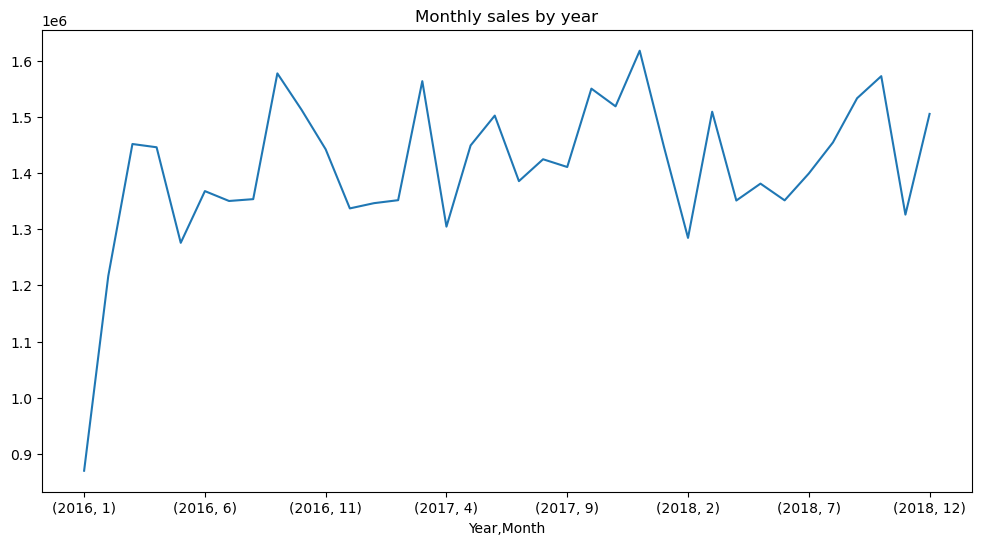

In [24]:
#Plot total monthly sales by year 
plt.figure(figsize=(12,6))
df.groupby(['Year', 'Month'])['Total_Amt'].sum().plot(kind='line', title='Monthly sales by year')

plt.show()


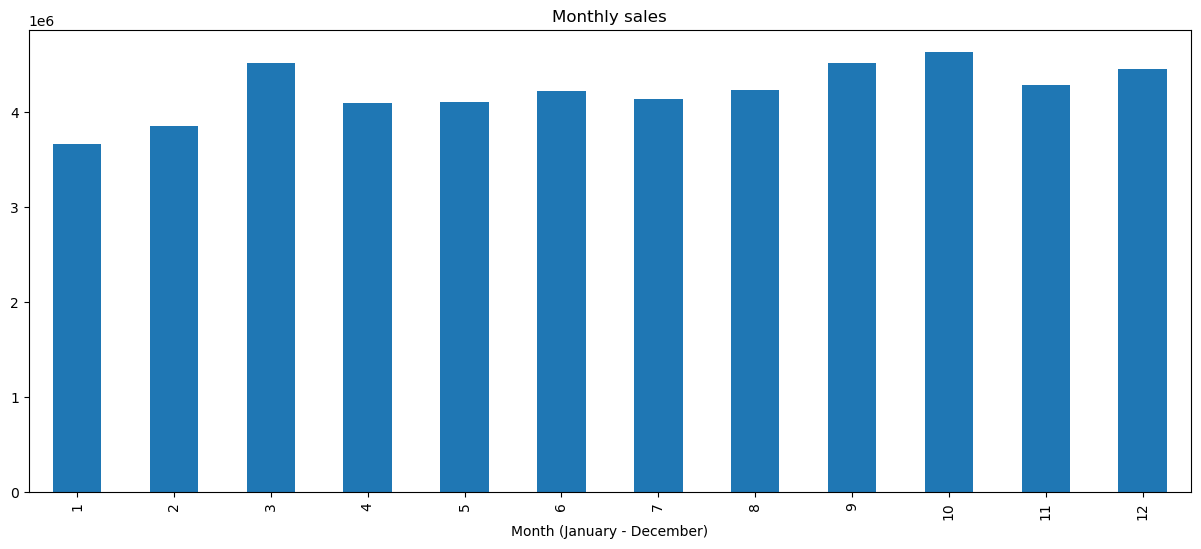

In [25]:
#Plot total monthly sales 
plt.figure(figsize=(15,6))
df.groupby('Month')['Total_Amt'].sum().plot(kind='bar', title='Monthly sales', xlabel='Month (January - December)')

plt.show()

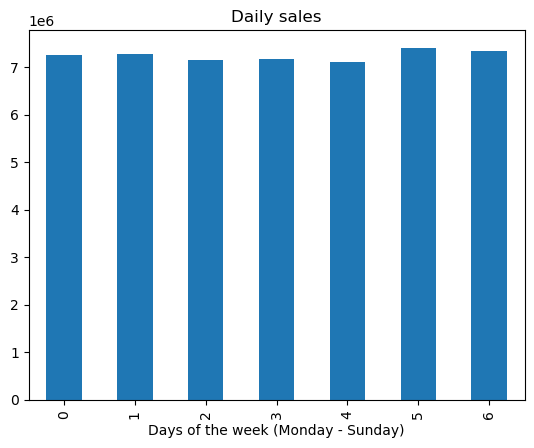

In [26]:
#Plot total daily sales 
df.groupby('DayOfWeek')['Total_Amt'].sum().plot(kind='bar', title='Daily sales', xlabel='Days of the week (Monday - Sunday)')
plt.show()

<Axes: title={'center': 'Weekends sales'}, xlabel='Saturday - Sunday'>

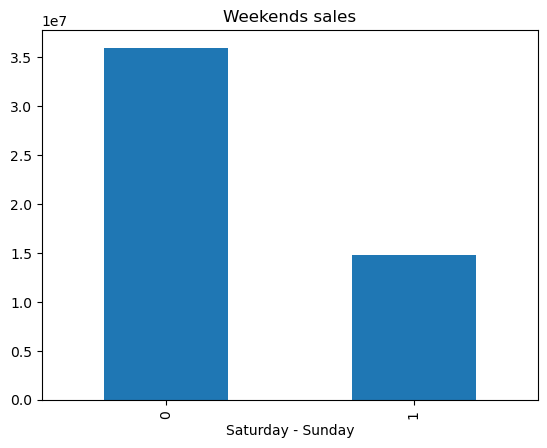

In [27]:
#Plot total weekend sales  
df.groupby('Weekend')['Total_Amt'].sum().plot(kind='bar', title= 'Weekends sales', xlabel='Saturday - Sunday')


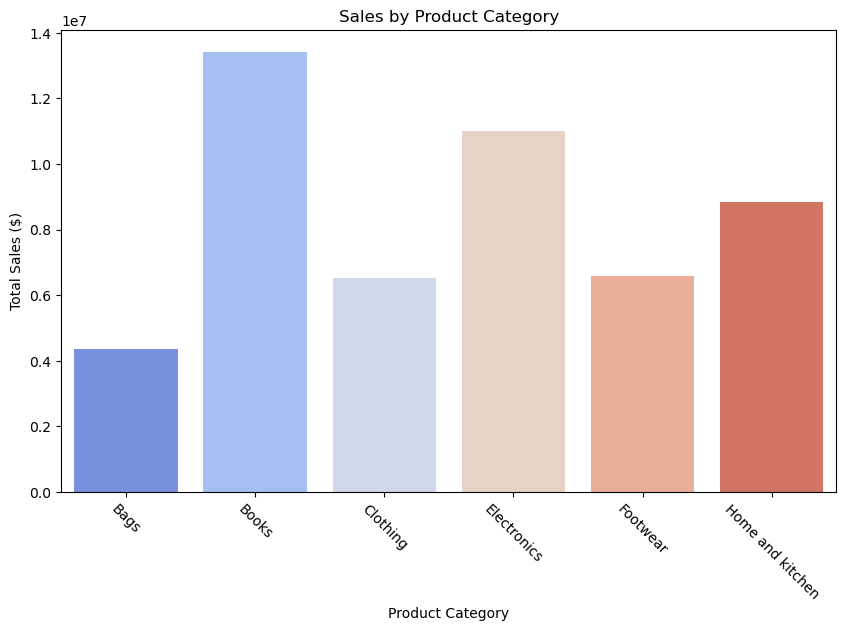

In [28]:
sales = df.groupby('Product_Category')['Total_Amt'].sum()


plt.figure(figsize=(10, 6))
sns.barplot(x=sales.index, y=sales.values, palette="coolwarm")
plt.xticks(rotation=-45)
plt.xlabel('Product Category')
plt.ylabel('Total Sales ($)')
plt.title('Sales by Product Category')
plt.show()


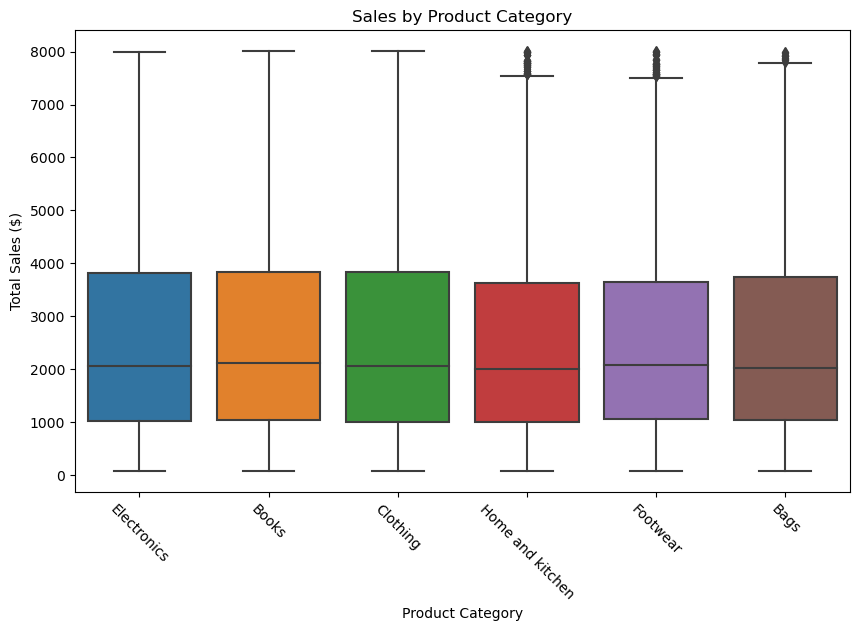

In [29]:
#Plot in boxplot sales by category????????????????
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Product_Category'], y=df['Total_Amt'])
plt.xticks(rotation=-45)
plt.xlabel('Product Category')
plt.ylabel('Total Sales ($)')
plt.title('Sales by Product Category')
plt.show()

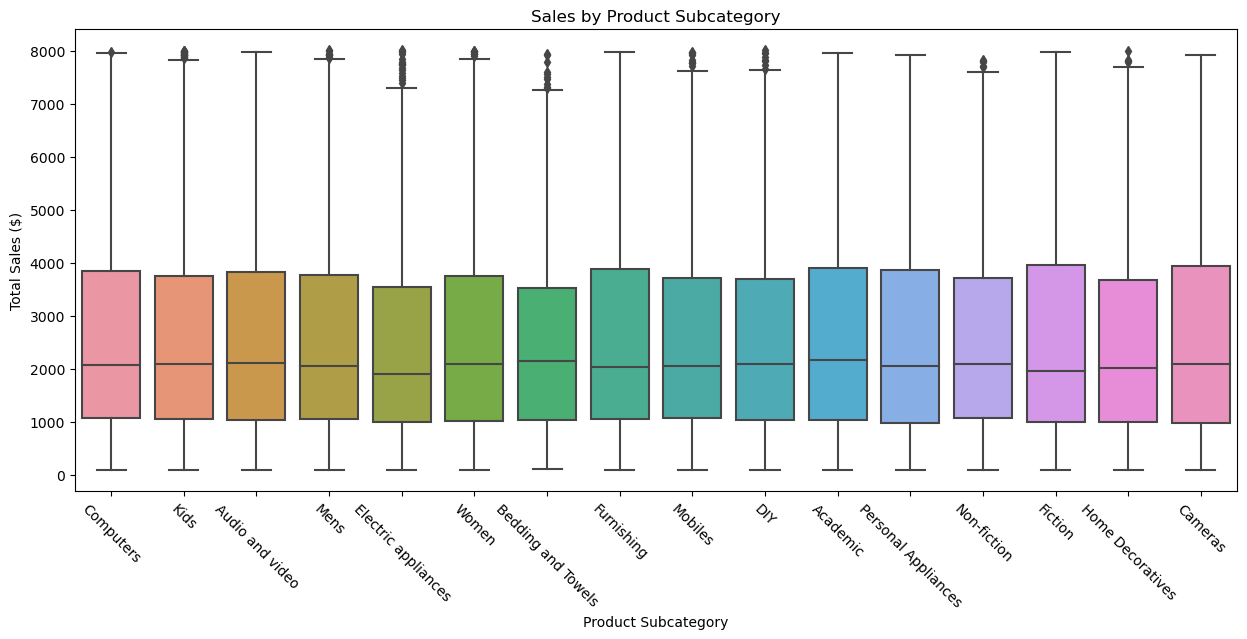

In [30]:
#Plot in boxplot sales by Sub_category ?????????????????????
plt.figure(figsize=(15, 6))
sns.boxplot(x=df['Product_Sub_category'], y=df['Total_Amt'])
plt.xticks(rotation=-45)
plt.xlabel('Product Subcategory')
plt.ylabel('Total Sales ($)')
plt.title('Sales by Product Subcategory')
plt.show()
